In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
print("testing")

testing


# PROFANITY DATASET 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("konradb/profanities-in-english-collection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/profanities-in-english-collection


In [5]:
# Print all column names
print(profanity_df.columns)

Index(['text', 'canonical_form_1', 'canonical_form_2', 'canonical_form_3',
       'category_1', 'category_2', 'category_3', 'severity_rating',
       'severity_description'],
      dtype='object')


In [3]:
import pandas as pd
import nltk
from nltk.corpus import words

nltk.download('words')


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# CEATING PROFANITY LIST WITH LABEL 1 

In [10]:
import pandas as pd
import nltk
from nltk.corpus import words

# Download the NLTK words corpus
nltk.download('words')

# Load the profanity dataset
file_path = "/kaggle/input/profanities-in-english-collection/profanity_en.csv"
profanity_df = pd.read_csv(file_path)

# Extract profanity words from both columns
profanity_words = set(
    profanity_df['text'].dropna().str.lower().str.strip()
).union(
    profanity_df['canonical_form_1'].dropna().str.lower().str.strip()
)

# Load general English words from NLTK
english_words = set(words.words())

# Ensure all words are included
all_words = english_words.union(profanity_words)  # Merge both lists

# Correctly label each word
data = []
for word in all_words:
    if word in profanity_words:  
        label = 1  # Profanity word
    else:
        label = 0  # General word
    data.append((word, label))

# Convert to DataFrame
df = pd.DataFrame(data, columns=["word", "label"])

# Save cleaned dataset
df.to_csv("cleaned_profanity_dataset.csv", index=False)

# Print Summary
print(f"✅ Total Profanity Words Loaded: {len(profanity_words)}")
print(f"✅ Total General English Words (before merging): {len(english_words)}")
print(f"✅ Final Dataset Size (Profanity + General): {len(df)}")  # Should be greater than NLTK words


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
✅ Total Profanity Words Loaded: 1658
✅ Total General English Words (before merging): 235892
✅ Final Dataset Size (Profanity + General): 237390


In [15]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

# Load profanity dataset
file_path = "/kaggle/input/profanities-in-english-collection/profanity_en.csv"
profanity_df = pd.read_csv(file_path, usecols=['text', 'canonical_form_1', 'canonical_form_2'])
profanity_words = set(
    profanity_df['text'].dropna().str.lower().str.strip()
).union(profanity_df['canonical_form_1'].dropna().str.lower().str.strip()
).union(profanity_df['canonical_form_2'].dropna().str.lower().str.strip())

# Load a more casual clean word list (e.g., from a subtitle corpus or custom list)
# For simplicity, we'll simulate with NLTK for now
nltk.download('words')
clean_words = set(nltk.corpus.words.words()) - profanity_words

# Create labeled dataset
data = [(word, 1) for word in profanity_words] + [(word, 0) for word in clean_words]
df = pd.DataFrame(data, columns=["word", "label"])

# Balance dataset
profanity_df = df[df["label"] == 1]
clean_df = df[df["label"] == 0].sample(len(profanity_df), random_state=42)
df = pd.concat([profanity_df, clean_df]).sample(frac=1, random_state=42)

# Clean data
df = df.dropna().query("word != ''")
X_train, X_test, y_train, y_test = train_test_split(df["word"], df["label"], test_size=0.2, random_state=42)

# Improved pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),  # Character n-grams
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Stronger classifier
])

# Train and save
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "improved_profanity_filter.pkl")

# Evaluate
accuracy = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Test predictions
test_words = ["shit", "hello", "damn", "peace", "love", "f***", "idiot", "bullshit"]
predictions = pipeline.predict(test_words)
for word, label in zip(test_words, predictions):
    print(f"'{word}' → {'Profanity' if label == 1 else 'Clean'}")

[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
Model Accuracy: 0.91
'shit' → Profanity
'hello' → Clean
'damn' → Profanity
'peace' → Clean
'love' → Clean
'f***' → Profanity
'idiot' → Clean
'bullshit' → Profanity


In [3]:
pip install SpeechRecognition


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 51.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyttsx3


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install SimpleAudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for SimpleAudio: filename=simpleaudio-1.0.4-cp310-cp310-linux_x86_64.whl size=2054404 sha256=66322c953f5f97d669018ba917971928ecb816f77281fa97e9b77022f0183c9d
  Stored in directory: /root/.cache/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built SimpleAudio
Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [7]:
!pip install sounddevice


In [8]:
import speech_recognition as sr


# GENERATES THE RESULTANT AUDIO WITH BEEP AT THE CUSS WORD PART IN AUDIO

In [75]:
import os
import shutil
import joblib
import numpy as np
import pandas as pd
import pyttsx3
import speech_recognition as sr
from pydub import AudioSegment
from pydub.generators import Sine

# 🔹 Load trained profanity filter model
pipeline = joblib.load("profanity_filter.pkl")
vectorizer = pipeline.named_steps['vectorizer']

# 🔹 Copy the file to Kaggle's writable directory
def copy_to_working_dir(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Error: File not found - {file_path}")
    
    file_name = os.path.basename(file_path)
    new_path = f"/kaggle/working/{file_name}"
    shutil.copy(file_path, new_path)
    return new_path

# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    if ext.lower() != ".wav":  
        audio = AudioSegment.from_file(file_path, format=ext[1:])  
        wav_path = f"/kaggle/working/{file_name}.wav"

        audio = audio.set_channels(1).set_frame_rate(44100)  
        audio.export(wav_path, format="wav")
        return wav_path
    return file_path

# 🔹 Recognize speech from an audio file
def recognize_speech(file_path=None):
    recognizer = sr.Recognizer()
    
    if file_path:  
        try:
            copied_audio = copy_to_working_dir(file_path)
            wav_file = convert_to_wav(copied_audio)

            with sr.AudioFile(wav_file) as source:
                print("Processing recorded audio...")
                audio = recognizer.record(source)
            
            text = recognizer.recognize_google(audio).lower()
            print(f"You said: {text}")
            return text, wav_file  # Return text & audio path
        except sr.UnknownValueError:
            print("Sorry, could not understand audio.")
        except sr.RequestError:
            print("Speech Recognition service unavailable.")
        except Exception as e:
            print(f"Error processing file: {e}")
        return "", ""
    
    with sr.Microphone() as source:
        print("Speak now...")
        audio = recognizer.listen(source)
    
    try:
        text = recognizer.recognize_google(audio).lower()
        print(f"You said: {text}")
        return text, None
    except sr.UnknownValueError:
        print("Sorry, could not understand audio.")
        return "", None
    except sr.RequestError:
        print("Speech Recognition service unavailable.")
        return "", None

# 🔹 Beep sound generator using pydub
def beep_sound(duration_ms=500):
    beep = Sine(1000).to_audio_segment(duration=duration_ms)
    return beep

# 🔹 Profanity filtering
def filter_profanity(text):
    if not text:
        return ""

    words = text.split()
    filtered_words = []

    for word in words:
        word = word.lower()
        try:
            vectorized_word = vectorizer.transform([word])
            prediction = pipeline.predict(vectorized_word)[0]
            filtered_words.append("***" if prediction == 1 else word)
        except:
            filtered_words.append(word)

    return " ".join(filtered_words)

# 🔹 Profanity filtering and censoring audio with beep integration
def censor_audio(original_audio_path, detected_text):
    if not os.path.exists(original_audio_path):
        print("Original audio file not found.")
        return None
    
    profanity_list = ["shit", "damn", "fuck", "idiot"]  
    audio = AudioSegment.from_wav(original_audio_path)

    beep = beep_sound(duration_ms=500)  # Create a beep sound (500ms duration)
    words = detected_text.split()
    censored_audio = AudioSegment.silent(duration=0)  # Start with silence

    word_idx = 0
    word_durations = []  # To store the duration of each word for synchronization
    for word in words:
        if word in profanity_list:
            print(f"Censoring: {word}")
            word_durations.append(len(beep))  # Use beep's length
            censored_audio += beep  # Add beep instead of the bad word
        else:
            word_audio = AudioSegment.from_wav(original_audio_path)  # Extract original word's segment
            word_duration = len(word_audio) // len(words)
            word_durations.append(word_duration)
            censored_audio += word_audio[word_idx:word_idx + word_duration]  # Add original audio part
        word_idx += 1

    censored_audio_path = "/kaggle/working/censored_audio.wav"
    censored_audio.export(censored_audio_path, format="wav")
    return censored_audio_path

# 🔹 Merge audio files (speech + beep) in parallel
def merge_audio_in_parallel(original_audio_path, censored_audio_path):
    original_audio = AudioSegment.from_wav(original_audio_path)
    censored_audio = AudioSegment.from_wav(censored_audio_path)

    # Make sure both audios are the same length by padding with silence if needed
    min_length = min(len(original_audio), len(censored_audio))
    original_audio = original_audio[:min_length]
    censored_audio = censored_audio[:min_length]

    # Merge the two in parallel (i.e., at the same time)
    combined_audio = original_audio.overlay(censored_audio)
    merged_audio_path = "/kaggle/working/merged_audio.wav"
    combined_audio.export(merged_audio_path, format="wav")
    return merged_audio_path

# 🔹 Convert text to speech with beep censorship
def text_to_speech(text):
    engine = pyttsx3.init()
    words = text.split()
    
    for word in words:
        if word == "***":
            beep_sound()
        else:
            engine.say(word)
    engine.runAndWait()

# 🔹 Evaluate Model Accuracy
def evaluate_model():
    test_words = ["shit", "damn", "fuck", "idiot", "bitch", "nigga", "bulshit", "asshole"] 
    predictions = pipeline.predict(test_words)

    print("\nTest Word Predictions:")
    for word, label in zip(test_words, predictions):
        print(f"'{word}' → {'Profanity' if label == 1 else 'Clean'}")

    df = pd.read_csv("/kaggle/working/cleaned_profanity_dataset.csv")  
    df = df.dropna()

    X_test = df["word"].astype(str).str.lower().tolist()
    y_test = df["label"].astype(int).tolist()

    accuracy = pipeline.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy:.2f} ✅")

# 🔹 Cleanup temp files
def cleanup_files(file_paths, keep_files=None):
    if keep_files is None:
        keep_files = []
        
    for file in file_paths:
        if file not in keep_files and os.path.exists(file):
            os.remove(file)
            print(f"Deleted: {file}")

# 🔹 Main Execution
if __name__ == "__main__":
    evaluate_model()

    mode = input("\nChoose input mode: [1] Microphone [2] Audio File: ")

    if mode == "1":
        spoken_text, audio_path = recognize_speech()
    elif mode == "2":
        audio_file = input("Enter audio file path (MP3/WAV/M4A): ").strip()
        spoken_text, audio_path = recognize_speech(audio_file)
    else:
        print("Invalid choice.")
        exit()

    if spoken_text:
        cleaned_text = filter_profanity(spoken_text)
        print(f"Filtered Text: {cleaned_text}")

        censored_audio_path = None
        if audio_path:
            censored_audio_path = censor_audio(audio_path, spoken_text)

        if censored_audio_path:
            print(f"Censored audio saved at: {censored_audio_path}")

        # Merge original and censored audio
        if audio_path and censored_audio_path:
            merged_audio_path = merge_audio_in_parallel(audio_path, censored_audio_path)
            print(f"Merged audio saved at: {merged_audio_path}")

        # Cleanup
        cleanup_files([audio_path, censored_audio_path] if audio_path else [], keep_files=[merged_audio_path])



Test Word Predictions:
'shit' → Profanity
'damn' → Profanity
'fuck' → Profanity
'idiot' → Clean
'bitch' → Profanity
'nigga' → Profanity
'bulshit' → Clean
'asshole' → Profanity
Model Accuracy: 1.00 ✅



Choose input mode: [1] Microphone [2] Audio File:  2
Enter audio file path (MP3/WAV/M4A):  /kaggle/input/profanity-testing1/Recording.m4a


Processing recorded audio...
You said: you're a good person but hey fuck you
Filtered Text: you're a good person but hey fuck you
Censoring: fuck
Censored audio saved at: /kaggle/working/censored_audio.wav
Merged audio saved at: /kaggle/working/merged_audio.wav
Deleted: /kaggle/working/Recording.wav
Deleted: /kaggle/working/censored_audio.wav


In [76]:
import os
import shutil
import joblib
import numpy as np
import pandas as pd
import pyttsx3
import speech_recognition as sr
from pydub import AudioSegment
from pydub.generators import Sine

# 🔹 Load trained profanity filter model
pipeline = joblib.load("profanity_filter.pkl")
vectorizer = pipeline.named_steps['vectorizer']

# 🔹 Copy the file to Kaggle's writable directory
def copy_to_working_dir(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Error: File not found - {file_path}")
    
    file_name = os.path.basename(file_path)
    new_path = f"/kaggle/working/{file_name}"
    shutil.copy(file_path, new_path)
    return new_path

# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    if ext.lower() != ".wav":  
        audio = AudioSegment.from_file(file_path, format=ext[1:])  
        wav_path = f"/kaggle/working/{file_name}.wav"
        audio = audio.set_channels(1).set_frame_rate(44100)  
        audio.export(wav_path, format="wav")
        return wav_path
    return file_path

# 🔹 Recognize speech from an audio file
def recognize_speech(file_path=None):
    recognizer = sr.Recognizer()
    
    if file_path:  
        try:
            copied_audio = copy_to_working_dir(file_path)
            wav_file = convert_to_wav(copied_audio)

            with sr.AudioFile(wav_file) as source:
                print("Processing recorded audio...")
                audio = recognizer.record(source)
            
            text = recognizer.recognize_google(audio).lower()
            print(f"You said: {text}")
            return text, wav_file  # Return text & audio path
        except sr.UnknownValueError:
            print("Sorry, could not understand audio.")
        except sr.RequestError:
            print("Speech Recognition service unavailable.")
        except Exception as e:
            print(f"Error processing file: {e}")
        return "", ""
    
    with sr.Microphone() as source:
        print("Speak now...")
        audio = recognizer.listen(source)
    
    try:
        text = recognizer.recognize_google(audio).lower()
        print(f"You said: {text}")
        return text, None
    except sr.UnknownValueError:
        print("Sorry, could not understand audio.")
        return "", None
    except sr.RequestError:
        print("Speech Recognition service unavailable.")
        return "", None

# 🔹 Beep sound generator using pydub (louder beep)
def beep_sound(duration_ms=500, gain_db=20):
    beep = Sine(1000).to_audio_segment(duration=duration_ms)
    return beep + gain_db  # Increase the volume of the beep

# 🔹 Profanity filtering
def filter_profanity(text):
    if not text:
        return ""

    words = text.split()
    filtered_words = []

    for word in words:
        word = word.lower()
        try:
            vectorized_word = vectorizer.transform([word])
            prediction = pipeline.predict(vectorized_word)[0]
            filtered_words.append("***" if prediction == 1 else word)
        except:
            filtered_words.append(word)

    return " ".join(filtered_words)

# 🔹 Profanity filtering and censoring audio with beep integration
def censor_audio(original_audio_path, detected_text):
    if not os.path.exists(original_audio_path):
        print("Original audio file not found.")
        return None
    
    profanity_list = ["shit", "damn", "fuck", "idiot", "bitch", "nigga", "bulshit", "asshole"]   # Add more profane words as needed
    audio = AudioSegment.from_wav(original_audio_path)

    beep = beep_sound(duration_ms=500, gain_db=20)  # Make beep sound louder
    words = detected_text.split()
    censored_audio = AudioSegment.silent(duration=0)  # Start with silence

    word_idx = 0
    word_durations = []  # To store the duration of each word for synchronization
    word_positions = []  # To store start positions of each word in original audio

    # Calculate the positions of the words in the audio and the durations
    total_audio_length = len(audio)
    word_duration = total_audio_length // len(words)

    for word in words:
        start_time = word_idx * word_duration
        end_time = (word_idx + 1) * word_duration
        word_positions.append((start_time, end_time))
        word_idx += 1

    censored_audio = AudioSegment.silent(duration=0)  # Reset to empty audio

    # Start inserting original audio and beeps
    for word, (start_time, end_time) in zip(words, word_positions):
        if word in profanity_list:
            print(f"Censoring: {word}")
            censored_audio += beep  # Replace profane word with beep
        else:
            censored_audio += audio[start_time:end_time]  # Add the original word audio part
    
    censored_audio_path = "/kaggle/working/censored_audio.wav"
    censored_audio.export(censored_audio_path, format="wav")
    return censored_audio_path

# 🔹 Merge audio files (speech + beep) in parallel
def merge_audio_in_parallel(original_audio_path, censored_audio_path):
    original_audio = AudioSegment.from_wav(original_audio_path)
    censored_audio = AudioSegment.from_wav(censored_audio_path)

    # Make sure both audios are the same length by padding with silence if needed
    min_length = min(len(original_audio), len(censored_audio))
    original_audio = original_audio[:min_length]
    censored_audio = censored_audio[:min_length]

    # Merge the two in parallel (i.e., at the same time)
    combined_audio = original_audio.overlay(censored_audio)
    merged_audio_path = "/kaggle/working/merged_audio.wav"
    combined_audio.export(merged_audio_path, format="wav")
    return merged_audio_path

# 🔹 Convert text to speech with beep censorship
def text_to_speech(text):
    engine = pyttsx3.init()
    words = text.split()
    
    for word in words:
        if word == "***":
            beep_sound()
        else:
            engine.say(word)
    engine.runAndWait()

# 🔹 Main Execution
if __name__ == "__main__":
    mode = input("\nChoose input mode: [1] Microphone [2] Audio File: ")

    if mode == "1":
        spoken_text, audio_path = recognize_speech()
    elif mode == "2":
        audio_file = input("Enter audio file path (MP3/WAV/M4A): ").strip()
        spoken_text, audio_path = recognize_speech(audio_file)
    else:
        print("Invalid choice.")
        exit()

    if spoken_text:
        cleaned_text = filter_profanity(spoken_text)
        print(f"Filtered Text: {cleaned_text}")

        censored_audio_path = None
        if audio_path:
            censored_audio_path = censor_audio(audio_path, spoken_text)

        if censored_audio_path:
            print(f"Censored audio saved at: {censored_audio_path}")

        # Merge original and censored audio
        if audio_path and censored_audio_path:
            merged_audio_path = merge_audio_in_parallel(audio_path, censored_audio_path)
            print(f"Merged audio saved at: {merged_audio_path}")



Choose input mode: [1] Microphone [2] Audio File:  2
Enter audio file path (MP3/WAV/M4A):  /kaggle/input/cuss-word-beep-testing-multiple/Recording (2).m4a


Processing recorded audio...
You said: fuck you bitch nigga bulshit asshole but you are a good person
Filtered Text: fuck you bitch nigga bulshit asshole but you are a good person
Censoring: fuck
Censoring: bitch
Censoring: nigga
Censoring: bulshit
Censoring: asshole
Censored audio saved at: /kaggle/working/censored_audio.wav
Merged audio saved at: /kaggle/working/merged_audio.wav


In [82]:
import os
import shutil
import joblib
import numpy as np
import pandas as pd
import pyttsx3
import speech_recognition as sr
from pydub import AudioSegment
from pydub.generators import Sine

# 🔹 Load trained profanity filter model
pipeline = joblib.load("profanity_filter.pkl")
vectorizer = pipeline.named_steps['vectorizer']

# 🔹 Copy the file to Kaggle's writable directory
def copy_to_working_dir(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Error: File not found - {file_path}")
    
    file_name = os.path.basename(file_path)
    new_path = f"/kaggle/working/{file_name}"
    shutil.copy(file_path, new_path)
    return new_path

# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    if ext.lower() != ".wav":  
        audio = AudioSegment.from_file(file_path, format=ext[1:])  
        wav_path = f"/kaggle/working/{file_name}.wav"
        audio = audio.set_channels(1).set_frame_rate(44100)  
        audio.export(wav_path, format="wav")
        return wav_path
    return file_path

# 🔹 Recognize speech from an audio file
def recognize_speech(file_path=None):
    recognizer = sr.Recognizer()
    
    if file_path:  
        try:
            copied_audio = copy_to_working_dir(file_path)
            wav_file = convert_to_wav(copied_audio)

            with sr.AudioFile(wav_file) as source:
                print("Processing recorded audio...")
                audio = recognizer.record(source)
            
            text = recognizer.recognize_google(audio).lower()
            print(f"You said: {text}")
            return text, wav_file  # Return text & audio path
        except sr.UnknownValueError:
            print("Sorry, could not understand audio.")
        except sr.RequestError:
            print("Speech Recognition service unavailable.")
        except Exception as e:
            print(f"Error processing file: {e}")
        return "", ""
    
    with sr.Microphone() as source:
        print("Speak now...")
        audio = recognizer.listen(source)
    
    try:
        text = recognizer.recognize_google(audio).lower()
        print(f"You said: {text}")
        return text, None
    except sr.UnknownValueError:
        print("Sorry, could not understand audio.")
        return "", None
    except sr.RequestError:
        print("Speech Recognition service unavailable.")
        return "", None

# 🔹 Beep sound generator using pydub
def beep_sound(duration_ms=500):
    beep = Sine(1000).to_audio_segment(duration=duration_ms)
    beep = beep + 10  # Make beep louder
    return beep

# 🔹 Profanity filtering
def filter_profanity(text):
    if not text:
        return ""

    words = text.split()
    filtered_words = []

    for word in words:
        word = word.lower()
        try:
            vectorized_word = vectorizer.transform([word])
            prediction = pipeline.predict(vectorized_word)[0]
            filtered_words.append("***" if prediction == 1 else word)
        except:
            filtered_words.append(word)

    return " ".join(filtered_words)

# 🔹 Profanity filtering and censoring audio with beep integration
def censor_audio_with_beeps(original_audio_path, detected_text):
    if not os.path.exists(original_audio_path):
        print("Original audio file not found.")
        return None

    profanity_list = ["shit", "damn", "fuck", "idiot", "bitch", "nigga", "bulshit", "asshole"]  # Add more words if needed
    audio = AudioSegment.from_wav(original_audio_path)

    beep = beep_sound(duration_ms=500)  # Create a loud beep sound (500ms duration)
    words = detected_text.split()
    censored_audio = AudioSegment.silent(duration=0)  # Start with silence

    word_start = 0
    total_audio_length = len(audio)
    
    # Approximate word duration based on total audio length
    word_durations = total_audio_length // len(words) if len(words) > 0 else total_audio_length

    for word in words:
        word_end = word_start + word_durations
        
        if word in profanity_list:
            print(f"Censoring: {word}")
            censored_audio += AudioSegment.silent(duration=word_durations)  # Silence the cuss word part
            censored_audio += beep  # Add beep sound for cuss word
        else:
            censored_audio += audio[word_start:word_end]  # Add original audio part
        word_start = word_end  # Update the starting point for the next word

    # Ensure the censored audio has the same length as the original audio
    censored_audio = censored_audio[:len(audio)]  # Trim if it's too long
    censored_audio_path = "/kaggle/working/censored_audio_with_beeps.wav"
    censored_audio.export(censored_audio_path, format="wav")
    return censored_audio_path


def merge_audio_with_beeps_only(original_audio_path, censored_audio_path):
    original_audio = AudioSegment.from_wav(original_audio_path)
    censored_audio = AudioSegment.from_wav(censored_audio_path)

    # Ensure both audios are the same length by trimming or padding
    min_length = min(len(original_audio), len(censored_audio))
    original_audio = original_audio[:min_length]
    censored_audio = censored_audio[:min_length]

    # We only want to combine the beep sound with the censored version, no overlap of the original audio
    combined_audio = censored_audio

    merged_audio_path = "/kaggle/working/merged_audio_with_beeps_only.wav"
    combined_audio.export(merged_audio_path, format="wav")
    return merged_audio_path


# Main execution part
if __name__ == "__main__":
    mode = input("\nChoose input mode: [1] Microphone [2] Audio File: ")

    if mode == "1":
        spoken_text, audio_path = recognize_speech()
    elif mode == "2":
        audio_file = input("Enter audio file path (MP3/WAV/M4A): ").strip()
        spoken_text, audio_path = recognize_speech(audio_file)
    else:
        print("Invalid choice.")
        exit()

    if spoken_text:
        cleaned_text = filter_profanity(spoken_text)
        print(f"Filtered Text: {cleaned_text}")

        censored_audio_path = None
        if audio_path:
            censored_audio_path = censor_audio_with_beeps(audio_path, spoken_text)

        if censored_audio_path:
            print(f"Censored audio with beeps saved at: {censored_audio_path}")

        # Merge original and censored audio (with beeps only)
        if audio_path and censored_audio_path:
            merged_audio_path = merge_audio_with_beeps_only(audio_path, censored_audio_path)
            print(f"Merged audio saved at: {merged_audio_path}")



Choose input mode: [1] Microphone [2] Audio File:  2
Enter audio file path (MP3/WAV/M4A):  /kaggle/input/cuss-word-beep-testing-multiple/Recording (2).m4a


Processing recorded audio...
You said: fuck you bitch nigga bulshit asshole but you are a good person
Filtered Text: fuck you bitch nigga bulshit asshole but you are a good person
Censoring: fuck
Censoring: bitch
Censoring: nigga
Censoring: bulshit
Censoring: asshole
Censored audio with beeps saved at: /kaggle/working/censored_audio_with_beeps.wav
Merged audio saved at: /kaggle/working/merged_audio_with_beeps_only.wav


# DAY 2: USED THE CLEANED PROFANITY DATASET , SORTED IT AND APPLIED BINARY SEARCH TO FIND IF WORD MATCHES ANY OF PROFANITY WORD (LABELED 1) IN THE SAME LIST. IT IS MORE EFFICIENT THAN NORMAL SEARCHING

In [35]:
import os
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment


# 🔹 Load Profanity List
def load_profanity_list():
    file_path = "/kaggle/input/nltk-words-with-profanity-labeled-1/cleaned_profanity_dataset.csv"
    df = pd.read_csv(file_path)
    profanity_words = set(df[df['label'] == 1]['word'].str.lower().str.strip())
    profanity_words.update(['bullshit', 'asshole'])  # Manually add common profanities
    return profanity_words


# 🔹 Check if a word is profane
def is_profane(word, profanity_words):
    word = ''.join(char for char in word.lower().strip() if char.isalnum())  # Normalize word
    return word in profanity_words and len(word) >= 2


# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    output_path = f"/kaggle/working/{file_name}.wav"
    if ext.lower() != ".wav":
        audio = AudioSegment.from_file(file_path, format=ext[1:])
        audio = audio.set_channels(1).set_frame_rate(16000)  # Normalize audio
        audio.export(output_path, format="wav")
    return output_path


# 🔹 Improved Speech Recognition with Precise Timings
def recognize_speech(file_path):
    recognizer = sr.Recognizer()
    try:
        wav_file = convert_to_wav(file_path)
        audio_segment = AudioSegment.from_wav(wav_file)
        total_duration = len(audio_segment)  # in milliseconds

        with sr.AudioFile(wav_file) as source:
            print("Processing recorded audio...")
            audio = recognizer.record(source)

        text = recognizer.recognize_google(audio).lower()
        print(f"Detected Speech: {text}")
        words = text.split()
        num_words = len(words)

        if num_words == 0:
            return "", [], ""

        # Improved timing allocation based on word length
        total_chars = sum(len(word) for word in words)
        word_timings = []
        current_time = 0

        for word in words:
            word_duration = (len(word) / total_chars) * total_duration  # Adjust timing dynamically
            start_time = current_time
            end_time = min(start_time + word_duration, total_duration)

            word_timings.append((word, int(start_time), int(end_time)))
            current_time = end_time + 10  # Small gap for separation

        return text, word_timings, wav_file

    except Exception as e:
        print(f"Error processing file: {e}")
        return "", [], ""


# 🔹 Properly Silence Profane Words
def silence_audio_for_cuss_words(original_audio_path, word_timings, profanity_words):
    if not os.path.exists(original_audio_path):
        print("Original audio file not found.")
        return None

    audio = AudioSegment.from_wav(original_audio_path)
    total_duration = len(audio)

    # Ensure no overlap in timings
    adjusted_timings = []
    prev_end = 0
    for word, start, end in word_timings:
        start = max(prev_end, start)
        end = min(total_duration, max(start + 100, end))  # Ensure minimum 100ms duration
        adjusted_timings.append((word, start, end))
        prev_end = end

    # Silence detected profanity
    for word, start_time, end_time in adjusted_timings:
        if is_profane(word, profanity_words):
            duration = end_time - start_time
            print(f"Censoring: {word} ({start_time}ms - {end_time}ms)")

            silence_segment = AudioSegment.silent(duration=duration)
            audio = audio[:start_time] + silence_segment + audio[end_time:]

    censored_audio_path = "/kaggle/working/censored_audio.wav"
    audio.export(censored_audio_path, format="wav")
    return censored_audio_path


# 🔹 Main Execution
if __name__ == "__main__":
    os.makedirs("/kaggle/working", exist_ok=True)

    profanity_words = load_profanity_list()

    # Enter audio file path
    audio_file = input("Enter audio file path (MP3/WAV/M4A): ").strip()
    spoken_text, word_timings, audio_path = recognize_speech(audio_file)

    if spoken_text:
        print("Word timings:", [(w, s, e) for w, s, e in word_timings])
        censored_audio_path = silence_audio_for_cuss_words(audio_path, word_timings, profanity_words)
        if censored_audio_path:
            print(f"Censored audio saved at: {censored_audio_path}")
        else:
            print("Failed to generate censored audio.")


Enter audio file path (MP3/WAV/M4A):  /kaggle/input/cuss-word-beep-testing-multiple/Recording (2).m4a


Processing recorded audio...
Detected Speech: fuck you bitch nigga bulshit asshole but you are a good person
Word timings: [('fuck', 0, 625), ('you', 635, 1105), ('bitch', 1115, 1897), ('nigga', 1907, 2689), ('bulshit', 2699, 3794), ('asshole', 3804, 4899), ('but', 4909, 5379), ('you', 5389, 5858), ('are', 5868, 6338), ('a', 6348, 6504), ('good', 6514, 7140), ('person', 7150, 7979)]
Censoring: fuck (0ms - 625ms)
Censoring: bitch (1115ms - 1897ms)
Censoring: nigga (1907ms - 2689ms)
Censoring: asshole (3804ms - 4899ms)
Censored audio saved at: /kaggle/working/censored_audio.wav


# TRYING TO USE ARTIFICIAL VOICE GENERATOR WITH BEEPS BECAUSE MODIFIYING RAW AUDIO WAS CAUSING TIMING ISSUES 

In [10]:
pip install gtts

Note: you may need to restart the kernel to use updated packages.


In [41]:
import os
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment
from gtts import gTTS
import numpy as np

# 🔹 Load Profanity Dataset
def load_profanity_list():
    file_path = "/kaggle/input/d/shadow4ever/nltk-words-with-profanity-labeled-1/cleaned_profanity_dataset.csv"
    df = pd.read_csv(file_path)
    profanity_words = set(df[df['label'] == 1]['word'].str.lower().str.strip())
    profanity_words.update(['bullshit', 'asshole'])  # Add variants
    return profanity_words

# 🔹 Check if a word is profane
def is_profane(word, profanity_words):
    word = ''.join(char for char in word.lower().strip() if char.isalnum())
    return word in profanity_words and len(word) >= 2

# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    output_path = f"/kaggle/working/{file_name}.wav"
    if ext.lower() != ".wav":
        audio = AudioSegment.from_file(file_path, format=ext[1:])
        audio = audio.set_channels(1).set_frame_rate(16000)
        audio.export(output_path, format="wav")
    return output_path

# 🔹 Transcribe Speech and Flag Profane Words
def transcribe_and_flag(file_path, profanity_words):
    recognizer = sr.Recognizer()
    try:
        wav_file = convert_to_wav(file_path)
        with sr.AudioFile(wav_file) as source:
            print("Processing recorded audio...")
            audio = recognizer.record(source)

        text = recognizer.recognize_google(audio).lower()
        print(f"Detected Speech: {text}")

        # Split into words and flag profane ones
        words = text.split()
        modified_words = []
        for word in words:
            if is_profane(word, profanity_words):
                modified_words.append("[BEEP]")
                print(f"Flagged profane word: {word}")
            else:
                modified_words.append(word)

        modified_text = " ".join(modified_words)
        print(f"Modified Text: {modified_text}")
        return modified_text, wav_file

    except Exception as e:
        print(f"Error processing file: {e}")
        return "", ""

# 🔹 Generate a Simple Beep Sound (Fallback)
def create_beep_sound(duration=500, freq=1000):
    # Generate a sine wave for beep
    sample_rate = 44100
    t = np.linspace(0, duration / 1000, int(sample_rate * duration / 1000), False)
    beep_signal = 0.5 * np.sin(2 * np.pi * freq * t)  # 1000Hz tone
    audio_data = (beep_signal * 32767).astype(np.int16)  # Convert to 16-bit PCM
    beep = AudioSegment(audio_data.tobytes(), frame_rate=sample_rate, sample_width=2, channels=1)
    return beep

# 🔹 Generate Censored Audio with TTS and Beep
def generate_censored_audio(modified_text, output_path="/kaggle/working/censored_audio.mp3"):
    if not modified_text:
        print("No text to process.")
        return None

    # Load or create beep sound
    beep_path = "/kaggle/input/beep-sound/beep.wav"
    if os.path.exists(beep_path):
        print("Using provided beep sound...")
        beep = AudioSegment.from_file(beep_path)
    else:
        print("Beep sound not found, generating fallback beep...")
        beep = create_beep_sound(duration=500, freq=1000)  # 500ms, 1000Hz beep

    # Split text into segments around [BEEP]
    segments = modified_text.split("[BEEP]")
    final_audio = AudioSegment.empty()

    for i, segment in enumerate(segments):
        if segment.strip():
            # Generate TTS for non-beep segment
            tts = gTTS(text=segment.strip(), lang='en', slow=False)
            tts.save("/kaggle/working/temp.mp3")
            segment_audio = AudioSegment.from_mp3("/kaggle/working/temp.mp3")
            final_audio += segment_audio
        
        # Add beep after every segment except the last (if followed by text)
        if i < len(segments) - 1:
            final_audio += beep

    # Export final audio
    final_audio.export(output_path, format="mp3")
    return output_path

# 🔹 Main Execution
if __name__ == "__main__":
    os.makedirs("/kaggle/working", exist_ok=True)

    profanity_words = load_profanity_list()

    audio_file = input("Enter audio file path (MP3/WAV/M4A): ").strip()
    modified_text, wav_file = transcribe_and_flag(audio_file, profanity_words)

    if modified_text:
        censored_audio_path = generate_censored_audio(modified_text)
        if censored_audio_path:
            print(f"Censored audio saved at: {censored_audio_path}")
        else:
            print("Failed to generate censored audio.")

Enter audio file path (MP3/WAV/M4A):  /kaggle/input/cuss-word-beep-testing-multiple/Recording (2).m4a


Processing recorded audio...
Detected Speech: fuck you bitch nigga bulshit asshole but you are a good person
Flagged profane word: fuck
Flagged profane word: bitch
Flagged profane word: nigga
Flagged profane word: bulshit
Flagged profane word: asshole
Modified Text: [BEEP] you [BEEP] [BEEP] [BEEP] [BEEP] but you are a good person
Beep sound not found, generating fallback beep...
Censored audio saved at: /kaggle/working/censored_audio.mp3


# same code but WILL DISPLAY RAW AUDIO AND MODIFIED AUDIO IN OUTPUT SECTION (PLAYABLE)

In [42]:
import os
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment
from gtts import gTTS
import numpy as np
from IPython.display import Audio, display

# 🔹 Load Profanity Dataset
def load_profanity_list():
    file_path = "/kaggle/input/d/shadow4ever/nltk-words-with-profanity-labeled-1/cleaned_profanity_dataset.csv"
    df = pd.read_csv(file_path)
    profanity_words = set(df[df['label'] == 1]['word'].str.lower().str.strip())
    profanity_words.update(['bullshit', 'asshole'])  # Add variants
    return profanity_words

# 🔹 Check if a word is profane
def is_profane(word, profanity_words):
    word = ''.join(char for char in word.lower().strip() if char.isalnum())
    return word in profanity_words and len(word) >= 2

# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    output_path = f"/kaggle/working/{file_name}.wav"
    if ext.lower() != ".wav":
        audio = AudioSegment.from_file(file_path, format=ext[1:])
        audio = audio.set_channels(1).set_frame_rate(16000)
        audio.export(output_path, format="wav")
    return output_path

# 🔹 Transcribe Speech and Flag Profane Words
def transcribe_and_flag(file_path, profanity_words):
    recognizer = sr.Recognizer()
    try:
        wav_file = convert_to_wav(file_path)
        with sr.AudioFile(wav_file) as source:
            print("Processing recorded audio...")
            audio = recognizer.record(source)

        text = recognizer.recognize_google(audio).lower()
        print(f"Detected Speech: {text}")

        # Split into words and flag profane ones
        words = text.split()
        modified_words = []
        for word in words:
            if is_profane(word, profanity_words):
                modified_words.append("[BEEP]")
                print(f"Flagged profane word: {word}")
            else:
                modified_words.append(word)

        modified_text = " ".join(modified_words)
        print(f"Modified Text: {modified_text}")
        return modified_text, wav_file

    except Exception as e:
        print(f"Error processing file: {e}")
        return "", ""

# 🔹 Generate a Simple Beep Sound (Fallback)
def create_beep_sound(duration=500, freq=1000):
    sample_rate = 44100
    t = np.linspace(0, duration / 1000, int(sample_rate * duration / 1000), False)
    beep_signal = 0.5 * np.sin(2 * np.pi * freq * t)  # 1000Hz tone
    audio_data = (beep_signal * 32767).astype(np.int16)  # Convert to 16-bit PCM
    beep = AudioSegment(audio_data.tobytes(), frame_rate=sample_rate, sample_width=2, channels=1)
    return beep

# 🔹 Generate Censored Audio with TTS and Beep, Save and Display
def generate_and_display_censored_audio(modified_text, raw_wav_file, output_path="/kaggle/working/censored_audio.mp3"):
    if not modified_text:
        print("No text to process.")
        return None

    # Display raw audio
    print("Raw Audio Playback:")
    display(Audio(raw_wav_file))

    # Load or create beep sound
    beep_path = "/kaggle/input/beep-sound/beep.wav"
    if os.path.exists(beep_path):
        print("Using provided beep sound...")
        beep = AudioSegment.from_file(beep_path)
    else:
        print("Beep sound not found, generating fallback beep...")
        beep = create_beep_sound(duration=500, freq=1000)  # 500ms, 1000Hz beep

    # Split text into segments around [BEEP]
    segments = modified_text.split("[BEEP]")
    final_audio = AudioSegment.empty()

    for i, segment in enumerate(segments):
        if segment.strip():
            # Generate TTS for non-beep segment
            tts = gTTS(text=segment.strip(), lang='en', slow=False)
            tts.save("/kaggle/working/temp.mp3")
            segment_audio = AudioSegment.from_mp3("/kaggle/working/temp.mp3")
            final_audio += segment_audio
        
        # Add beep after every segment except the last (if followed by text)
        if i < len(segments) - 1:
            final_audio += beep

    # Save the censored audio
    final_audio.export(output_path, format="mp3")
    
    # Display the censored audio
    print("Censored Audio Playback:")
    display(Audio(output_path))
    
    return output_path

# 🔹 Main Execution
if __name__ == "__main__":
    os.makedirs("/kaggle/working", exist_ok=True)

    profanity_words = load_profanity_list()

    audio_file = input("Enter audio file path (MP3/WAV/M4A): ").strip()
    modified_text, wav_file = transcribe_and_flag(audio_file, profanity_words)

    if modified_text:
        censored_audio_path = generate_and_display_censored_audio(modified_text, wav_file)
        if censored_audio_path:
            print(f"Censored audio saved at: {censored_audio_path}")
        else:
            print("Failed to generate censored audio.")

Enter audio file path (MP3/WAV/M4A):  /kaggle/input/cuss-word-beep-testing-multiple/Recording (2).m4a


Processing recorded audio...
Detected Speech: fuck you bitch nigga bulshit asshole but you are a good person
Flagged profane word: fuck
Flagged profane word: bitch
Flagged profane word: nigga
Flagged profane word: bulshit
Flagged profane word: asshole
Modified Text: [BEEP] you [BEEP] [BEEP] [BEEP] [BEEP] but you are a good person
Raw Audio Playback:


Beep sound not found, generating fallback beep...
Censored Audio Playback:


Censored audio saved at: /kaggle/working/censored_audio.mp3


# **FINAL**

# **MODIFIED CODE TO TAKE INPUT AS TEXT AND AUDIO BOTH**
# *GENERATES TRANSCRIPT ALSO*

In [47]:
import os
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment
from gtts import gTTS
import numpy as np
from IPython.display import Audio, display

# 🔹 Load Profanity Dataset
def load_profanity_list():
    file_path = "/kaggle/input/d/shadow4ever/nltk-words-with-profanity-labeled-1/cleaned_profanity_dataset.csv"
    df = pd.read_csv(file_path)
    profanity_words = set(df[df['label'] == 1]['word'].str.lower().str.strip())
    profanity_words.update(['bullshit', 'asshole', 'bulshit'])  # Add variants including 'bulshit'
    return profanity_words

# 🔹 Check if a word is profane
def is_profane(word, profanity_words):
    word = ''.join(char for char in word.lower().strip() if char.isalnum())
    return word in profanity_words and len(word) >= 2

# 🔹 Censor middle characters of a word
def censor_word(word):
    if len(word) <= 2:
        return word  # Too short to censor
    return word[0] + '*' * (len(word) - 2) + word[-1]

# 🔹 Convert MP3/M4A to WAV
def convert_to_wav(file_path):
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    output_path = f"/kaggle/working/{file_name}.wav"
    if ext.lower() != ".wav":
        audio = AudioSegment.from_file(file_path, format=ext[1:])
        audio = audio.set_channels(1).set_frame_rate(16000)
        audio.export(output_path, format="wav")
    return output_path

# 🔹 Transcribe Speech from Audio
def transcribe_audio(file_path, profanity_words):
    recognizer = sr.Recognizer()
    try:
        wav_file = convert_to_wav(file_path)
        with sr.AudioFile(wav_file) as source:
            print("Processing recorded audio...")
            audio = recognizer.record(source)

        text = recognizer.recognize_google(audio).lower()
        print(f"Detected Speech: {text}")
        return text, wav_file

    except Exception as e:
        print(f"Error processing file: {e}")
        return "", ""

# 🔹 Process Input (Text or Audio) and Flag Profane Words
def process_input(input_type, input_value, profanity_words):
    if input_type.lower() == 'text':
        text = input_value.strip().lower()
        print(f"Input Text: {text}")
        raw_wav_file = None
    elif input_type.lower() == 'audio':
        text, raw_wav_file = transcribe_audio(input_value, profanity_words)
        if not text:
            return "", "", None, ""
    else:
        print("Invalid input type. Use 'text' or 'audio'.")
        return "", "", None, ""

    # Split into words and flag profane ones for censored audio
    words = text.split()
    modified_words = []
    transcript_words = []
    for word in words:
        if is_profane(word, profanity_words):
            modified_words.append("[BEEP]")
            transcript_words.append(censor_word(word))  # e.g., "fuck" -> "f**k"
            print(f"Flagged profane word: {word}")
        else:
            modified_words.append(word)
            transcript_words.append(word)

    modified_text = " ".join(modified_words)
    transcript = " ".join(transcript_words)
    print(f"Modified Text (for audio): {modified_text}")
    return text, modified_text, raw_wav_file, transcript

# 🔹 Generate a Simple Beep Sound (Fallback)
def create_beep_sound(duration=500, freq=1000):
    sample_rate = 44100
    t = np.linspace(0, duration / 1000, int(sample_rate * duration / 1000), False)
    beep_signal = 0.5 * np.sin(2 * np.pi * freq * t)
    audio_data = (beep_signal * 32767).astype(np.int16)
    beep = AudioSegment(audio_data.tobytes(), frame_rate=sample_rate, sample_width=2, channels=1)
    return beep

# 🔹 Generate and Display Raw and Censored Audio
def generate_and_display_audio(input_type, original_text, modified_text, raw_wav_file=None):
    # Generate/display raw audio
    if input_type.lower() == 'text':
        print("Generating Raw Audio Playback (with profane words):")
        tts_raw = gTTS(text=original_text, lang='en', slow=False)
        tts_raw.save("/kaggle/working/raw_audio.mp3")
        raw_audio = AudioSegment.from_mp3("/kaggle/working/raw_audio.mp3")
        raw_audio.export("/kaggle/working/raw_audio.wav", format="wav")
        display(Audio("/kaggle/working/raw_audio.wav"))
    elif input_type.lower() == 'audio' and raw_wav_file:
        print("Raw Audio Playback:")
        display(Audio(raw_wav_file))

    # Load or create beep sound
    beep_path = "/kaggle/input/beep-sound/beep.wav"
    if os.path.exists(beep_path):
        print("Using provided beep sound...")
        beep = AudioSegment.from_file(beep_path)
    else:
        print("Beep sound not found, generating fallback beep...")
        beep = create_beep_sound(duration=500, freq=1000)

    # Generate censored audio
    segments = modified_text.split("[BEEP]")
    final_audio = AudioSegment.empty()

    for i, segment in enumerate(segments):
        if segment.strip():
            tts = gTTS(text=segment.strip(), lang='en', slow=False)
            tts.save("/kaggle/working/temp.mp3")
            segment_audio = AudioSegment.from_mp3("/kaggle/working/temp.mp3")
            final_audio += segment_audio
        if i < len(segments) - 1:
            final_audio += beep

    # Save and display censored audio
    output_path = "/kaggle/working/censored_audio.mp3"
    final_audio.export(output_path, format="mp3")
    print("Censored Audio Playback:")
    display(Audio(output_path))
    return output_path

# 🔹 Main Execution
if __name__ == "__main__":
    os.makedirs("/kaggle/working", exist_ok=True)

    profanity_words = load_profanity_list()

    input_type = input("Enter input type ('text' or 'audio'): ").strip().lower()
    if input_type == 'text':
        input_value = input("Paste your text here: ").strip()
    elif input_type == 'audio':
        input_value = input("Enter audio file path (MP3/WAV/M4A): ").strip()
    else:
        print("Invalid input type. Please use 'text' or 'audio'.")
        input_value = ""

    if input_value:
        original_text, modified_text, raw_wav_file, transcript = process_input(input_type, input_value, profanity_words)
        if modified_text:
            censored_audio_path = generate_and_display_audio(input_type, original_text, modified_text, raw_wav_file)
            if censored_audio_path:
                print(f"Censored audio saved at: {censored_audio_path}")
                print("\nTranscript:")
                print(transcript)
            else:
                print("Failed to generate censored audio.")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Enter input type ('text' or 'audio'):  text
Paste your text here:  Fuck this shitty day, what a goddamn mess! That asshole boss of mine can suck it—seriously, what a prick. This bullshit job is driving me up the fucking wall, and those dickhead coworkers aren’t helping. I’m so pissed off, I could scream bloody murder. Cunt clients, bastard deadlines, and crap pay—what a hellish clusterfuck!


Input Text: fuck this shitty day, what a goddamn mess! that asshole boss of mine can suck it—seriously, what a prick. this bullshit job is driving me up the fucking wall, and those dickhead coworkers aren’t helping. i’m so pissed off, i could scream bloody murder. cunt clients, bastard deadlines, and crap pay—what a hellish clusterfuck!
Flagged profane word: fuck
Flagged profane word: shitty
Flagged profane word: goddamn
Flagged profane word: asshole
Flagged profane word: suck
Flagged profane word: prick.
Flagged profane word: bullshit
Flagged profane word: fucking
Flagged profane word: dickhead
Flagged profane word: cunt
Flagged profane word: bastard
Flagged profane word: clusterfuck!
Modified Text (for audio): [BEEP] this [BEEP] day, what a [BEEP] mess! that [BEEP] boss of mine can [BEEP] it—seriously, what a [BEEP] this [BEEP] job is driving me up the [BEEP] wall, and those [BEEP] coworkers aren’t helping. i’m so pissed off, i could scream bloody murder. [BEEP] clients, [BEEP] deadl

Beep sound not found, generating fallback beep...
Censored Audio Playback:


Censored audio saved at: /kaggle/working/censored_audio.mp3

Transcript:
f**k this s****y day, what a g*****n mess! that a*****e boss of mine can s**k it—seriously, what a p****. this b******t job is driving me up the f*****g wall, and those d******d coworkers aren’t helping. i’m so pissed off, i could scream bloody murder. c**t clients, b*****d deadlines, and crap pay—what a hellish c**********!


# USING THE RANDOM FOREST MODEL INTEGRATED TO PERFOM THE SAME 

In [21]:
import os
import pandas as pd
import numpy as np
import speech_recognition as sr
from pydub import AudioSegment
from gtts import gTTS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
import nltk
from IPython.display import Audio, display

# Ensure NLTK words corpus is downloaded
nltk.download('words')

def train_or_load_profanity_model(model_path="improved_profanity_filter.pkl"):
    """Train or load the profanity detection model."""
    if os.path.exists(model_path):
        print(f"Loading existing model from {model_path}...")
        return joblib.load(model_path)

    file_path = "/kaggle/input/profanities-in-english-collection/profanity_en.csv"
    profanity_df = pd.read_csv(file_path, usecols=['text', 'canonical_form_1', 'canonical_form_2'])
    profanity_words = set(profanity_df['text'].dropna().str.lower().str.strip()).union(
        profanity_df['canonical_form_1'].dropna().str.lower().str.strip()).union(
        profanity_df['canonical_form_2'].dropna().str.lower().str.strip())

    clean_words = set(nltk.corpus.words.words()) - profanity_words
    data = [(word, 1) for word in profanity_words] + [(word, 0) for word in clean_words]
    df = pd.DataFrame(data, columns=["word", "label"])
    profanity_df = df[df["label"] == 1]
    clean_df = df[df["label"] == 0].sample(len(profanity_df), random_state=42)
    df = pd.concat([profanity_df, clean_df]).sample(frac=1, random_state=42).dropna().query("word != ''")

    X_train, X_test, y_train, y_test = train_test_split(df["word"], df["label"], test_size=0.2, random_state=42)
    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)
    print(f"Model Accuracy: {accuracy:.2f}")
    joblib.dump(pipeline, model_path)
    print(f"Model saved to {model_path}")
    return pipeline

def convert_to_wav(file_path, output_dir="/kaggle/working"):
    """Convert MP3/M4A to WAV and return raw audio path."""
    os.makedirs(output_dir, exist_ok=True)
    file_name, ext = os.path.splitext(os.path.basename(file_path))
    output_path = os.path.join(output_dir, f"{file_name}_raw.wav")
    if ext.lower() != ".wav":
        audio = AudioSegment.from_file(file_path, format=ext[1:])
        audio = audio.set_channels(1).set_frame_rate(16000)
        audio.export(output_path, format="wav")
    return output_path

def create_beep_sound(duration=500, freq=1000):
    """Generate a simple beep sound."""
    sample_rate = 44100
    t = np.linspace(0, duration / 1000, int(sample_rate * duration / 1000), False)
    beep_signal = 0.5 * np.sin(2 * np.pi * freq * t)
    audio_data = (beep_signal * 32767).astype(np.int16)
    beep = AudioSegment(audio_data.tobytes(), frame_rate=sample_rate, sample_width=2, channels=1)
    return beep

def transcribe_audio(audio_file, output_dir="/kaggle/working"):
    """Transcribe audio file and return raw text and WAV path."""
    wav_file = convert_to_wav(audio_file, output_dir)
    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(wav_file) as source:
            audio = recognizer.record(source)
        raw_text = recognizer.recognize_google(audio).lower()
        return raw_text, wav_file
    except Exception as e:
        print(f"Error transcribing audio: {e}")
        return None, None

def censor_text_with_stars(text, model):
    """Censor text with stars for display and return modified text with [BEEP] for audio."""
    words = text.split()
    display_words = []
    audio_words = []
    for word in words:
        cleaned_word = ''.join(char for char in word.lower().strip() if char.isalnum())
        if cleaned_word and model.predict([cleaned_word])[0] == 1:
            print(f"Flagged profane word: {word}")
            censored_word = word[0] + "*" * (len(word) - 1) if len(word) > 1 else word
            display_words.append(censored_word)
            audio_words.append("[BEEP]")
        else:
            display_words.append(word)
            audio_words.append(word)
    return " ".join(display_words), " ".join(audio_words)

def generate_and_display_audio(input_type, original_text, modified_text, raw_wav_file=None, output_dir="/kaggle/working"):
    """Generate and display raw and censored audio."""
    base_name = os.path.splitext(os.path.basename(raw_wav_file))[0] if input_type == 'audio' else "generated"
    raw_audio_wav = os.path.join(output_dir, f"{base_name}_raw.wav")
    censored_audio_wav = os.path.join(output_dir, f"{base_name}_censored.wav")

    # Generate/display raw audio
    if input_type.lower() == 'text':
        print("Generating Raw Audio Playback (with profane words):")
        tts_raw = gTTS(text=original_text, lang='en', slow=False)
        tts_raw.save("/kaggle/working/temp_raw.mp3")
        AudioSegment.from_mp3("/kaggle/working/temp_raw.mp3").export(raw_audio_wav, format="wav")
        os.remove("/kaggle/working/temp_raw.mp3")
        display(Audio(raw_audio_wav))
    elif input_type.lower() == 'audio' and raw_wav_file:
        print("Raw Audio Playback:")
        display(Audio(raw_wav_file))

    # Load or create beep sound
    beep_path = "/kaggle/input/beep-sound/beep.wav"
    if os.path.exists(beep_path):
        print("Using provided beep sound...")
        beep = AudioSegment.from_file(beep_path)
    else:
        print("Beep sound not found, generating fallback beep...")
        beep = create_beep_sound()

    # Generate censored audio
    segments = modified_text.split("[BEEP]")
    final_audio = AudioSegment.empty()
    temp_file = os.path.join(output_dir, "temp.mp3")

    for i, segment in enumerate(segments):
        if segment.strip():
            tts = gTTS(text=segment.strip(), lang='en', slow=False)
            tts.save(temp_file)
            segment_audio = AudioSegment.from_mp3(temp_file)
            final_audio += segment_audio
        if i < len(segments) - 1:
            final_audio += beep

    final_audio.export(censored_audio_wav, format="wav")
    print("Censored Audio Playback:")
    display(Audio(censored_audio_wav))
    if os.path.exists(temp_file):
        os.remove(temp_file)
    
    return raw_audio_wav, censored_audio_wav

def process_input(input_data, is_audio=True, output_dir="/kaggle/working", model_path="improved_profanity_filter.pkl"):
    """Process audio file or text, display transcripts, and generate audio samples."""
    os.makedirs(output_dir, exist_ok=True)
    model = train_or_load_profanity_model(model_path)

    # Get raw text
    if is_audio:
        raw_text, raw_wav = transcribe_audio(input_data, output_dir)
        if raw_text is None:
            return None
    else:
        raw_text = input_data.lower()
        raw_wav = None

    # Censor text
    display_text, audio_text = censor_text_with_stars(raw_text, model)

    # Print initial processing details
    print(f"Input Text: {raw_text}")
    print(f"Modified Text (for audio): {audio_text}")

    # Generate and display audio
    raw_audio_path, censored_audio_path = generate_and_display_audio(
        'audio' if is_audio else 'text', raw_text, audio_text, raw_wav, output_dir
    )

    # Output section
    print("\nTranscript:")
    print(display_text)
    print(f"Raw Audio Sample: {raw_audio_path}")
    print(f"Censored Audio Sample: {censored_audio_path}")

    return raw_audio_path, censored_audio_path

# Main execution
if __name__ == "__main__":
    input_type = input("Enter input type ('text' or 'audio'): ").strip().lower()
    if input_type == 'audio':
        input_data = input("Enter audio file path (MP3/WAV/M4A): ").strip()
        result = process_input(input_data, is_audio=True)
    elif input_type == 'text':
        input_data = input("Paste your text here: ").strip()
        result = process_input(input_data, is_audio=False)
    else:
        print("Invalid input type. Use 'text' or 'audio'.")
        result = None

    if not result:
        print("Processing failed.")

[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


Enter input type ('text' or 'audio'):  audio
Enter audio file path (MP3/WAV/M4A):  /kaggle/input/cuss-word-beep-testing-multiple/Recording (2).m4a


Loading existing model from improved_profanity_filter.pkl...
Flagged profane word: fuck
Flagged profane word: bitch
Flagged profane word: nigga
Flagged profane word: bulshit
Flagged profane word: asshole
Flagged profane word: but
Flagged profane word: a
Input Text: fuck you bitch nigga bulshit asshole but you are a good person
Modified Text (for audio): [BEEP] you [BEEP] [BEEP] [BEEP] [BEEP] [BEEP] you are [BEEP] good person
Raw Audio Playback:


Beep sound not found, generating fallback beep...
Censored Audio Playback:



Transcript:
f*** you b**** n**** b****** a****** b** you are a good person
Raw Audio Sample: /kaggle/working/Recording (2)_raw_raw.wav
Censored Audio Sample: /kaggle/working/Recording (2)_raw_censored.wav


Model Accuracy on Test Set: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    235730
           1       0.08      0.98      0.15      1659

    accuracy                           0.92    237389
   macro avg       0.54      0.95      0.56    237389
weighted avg       0.99      0.92      0.95    237389



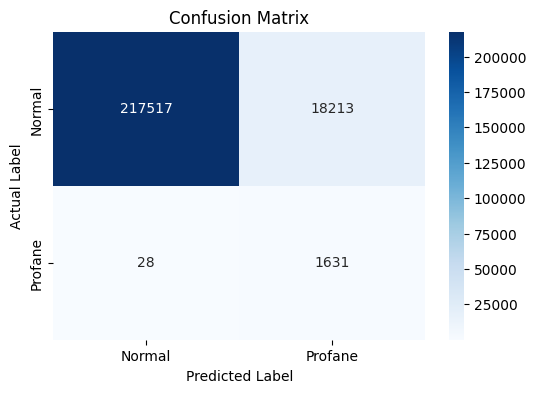

In [22]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset containing labeled words
dataset_path = "/kaggle/input/d/shadow4ever/nltk-words-with-profanity-labeled-1/cleaned_profanity_dataset.csv"
df_test = pd.read_csv(dataset_path)

# Ensure the dataset has the expected columns
df_test = df_test[['word', 'label']].dropna()
df_test['word'] = df_test['word'].str.lower().str.strip()

# Load the trained model
model_path = "improved_profanity_filter.pkl"
model = joblib.load(model_path)

# Predict labels for words in the dataset
predicted_labels = model.predict(df_test['word'])

# Calculate accuracy
accuracy = accuracy_score(df_test['label'], predicted_labels)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(df_test['label'], predicted_labels)

# Print classification report
print("\nClassification Report:")
print(classification_report(df_test['label'], predicted_labels))

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Profane'], yticklabels=['Normal', 'Profane'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()
